Important formulas:

$$\cos(\theta_e)=\bigg(1+\frac{m_e}{E_\nu}\bigg)\sqrt{\frac{T}{T+2m_e}}$$
$\theta_e$ angle between solar $\nu$ and electron emitted, T energy deposited by the event.
$$\cos(\theta_{Cher}) = \frac{1}{n \beta}$$
$$\beta = \sqrt{1 - \big(\frac{m_e}{m_e+T}\big)^2}$$

$$0 \leq T \leq \frac{2E_\nu^2}{m_e + 2E_\nu}$$
Tomalak et al., Theory of elastic neutrino-electron scattering

Goniometric formulas:
I have used the spherical coordinates that follow:
$$\begin{cases}
    x = \rho \cos(\theta) \sin(\phi) \\
    y = \rho \sin(\theta) \sin(\phi) \\
    z = \rho \cos(\phi)
    \end{cases}
    $$
with $\phi \in [0,\pi]$ and $\theta \in [0,2\pi)$ ($\phi$ is the colatitude). Distance between two points on a sphere:
$$\cos(\gamma) = \sin(\phi_A)\sin(\phi_B)\cos(\theta_A-\theta_B) + \cos(\phi_A) \cos(\phi_B)$$
Where $\gamma$ is the angular distance and A,B the points on the sphere.


Rotations 

A rotation with yaw $\theta_0$ and pitch $\phi_0$ gives a rotation matrix of:
$$\begin{bmatrix}
    \cos(\theta_0)\cos(\phi_0) & -\sin(\theta_0) & \cos(\theta_0)\sin(\phi_0) \\
    \sin(\theta_0)\cos(\phi_0) & \cos(\theta_0) & \sin(\theta_0)\sin(\phi_0) \\
    -\sin(\phi_0) & 0 & \cos(\phi_0)
    \end{bmatrix}$$

Number of photons emitted 20200


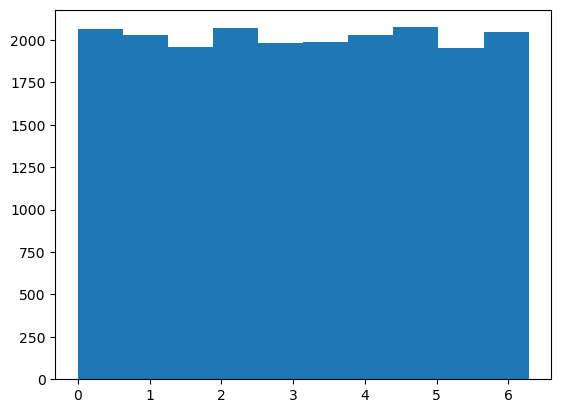

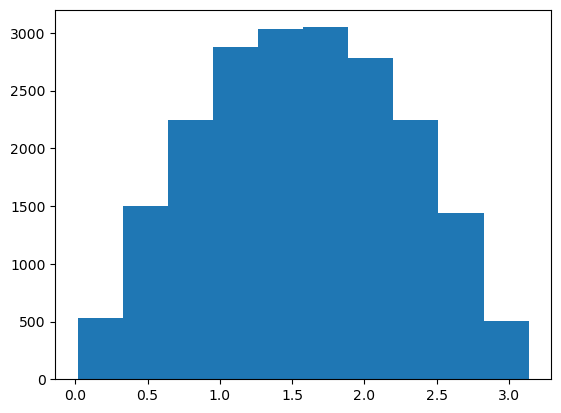

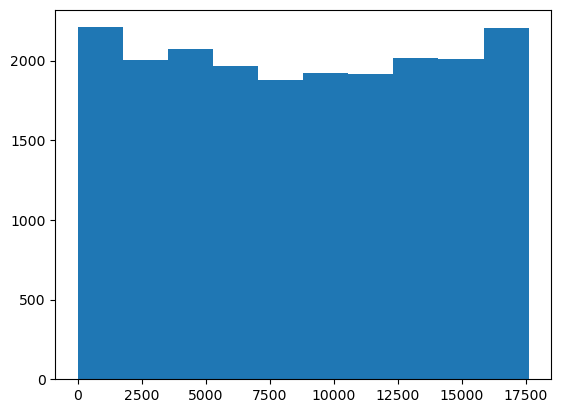

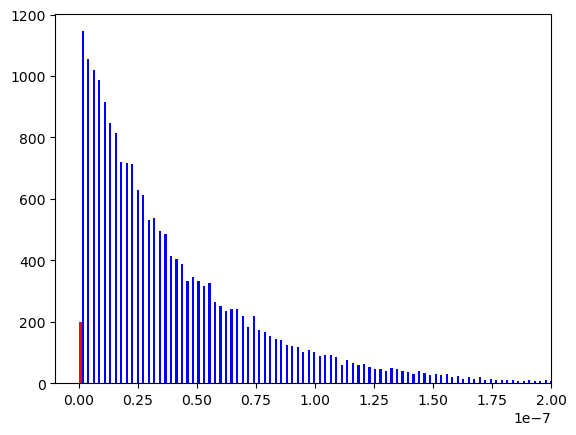

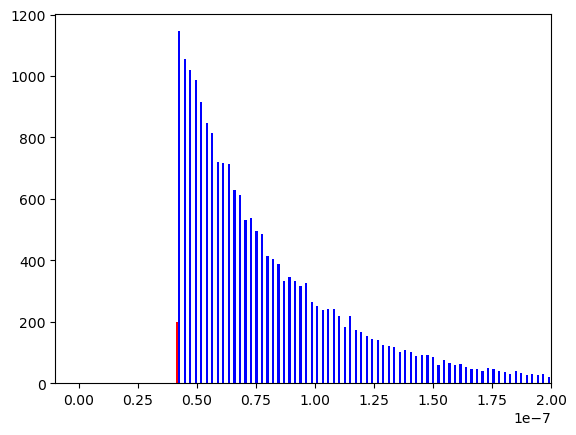

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table
import numpy as np
import sys
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d

Names = np.array(["theta","phi","closest_PMT","Start_Time","Arrival_Time","type"])
datas = Table.read("Output.txt",format="ascii",names=Names)

thetas = np.array(datas["theta"])
phis = np.array(datas["phi"])
closest_PMTs = np.array(datas["closest_PMT"])
Start_Times = np.array(datas["Start_Time"])
Arrival_Times = np.array(datas["Arrival_Time"])
types = np.array(datas["type"])
N = len(thetas)

print("Number of photons emitted", N)

Cher_thetas=[]
Cher_phis=[]
Cher_ArrTimes = []
Cher_StartTimes = []
Scint_thetas=[]
Scint_phis=[]
Scint_ArrTimes = []
Scint_StartTimes = []
for i in range(0,N) :
    if types[i] == 1 :
        Cher_thetas.append(thetas[i])
        Cher_phis.append(phis[i])
        Cher_StartTimes.append(Start_Times[i])
        Cher_ArrTimes.append(Arrival_Times[i])
    else :
        Scint_thetas.append(thetas[i])
        Scint_phis.append(phis[i])
        Scint_ArrTimes.append(Arrival_Times[i])
        Scint_StartTimes.append(Start_Times[i])

plt.hist(thetas);
plt.show()
plt.hist(phis);
plt.show()
plt.hist(closest_PMTs);
plt.show()
plt.hist((Cher_StartTimes,Scint_StartTimes),color=("red","blue"),bins=200)
plt.xlim(-10**-8,2*10**-7)
plt.show()
plt.hist((Cher_ArrTimes,Scint_ArrTimes),color=("red","blue"),bins=200)
plt.xlim(-10**-8,2*10**-7)
plt.show()

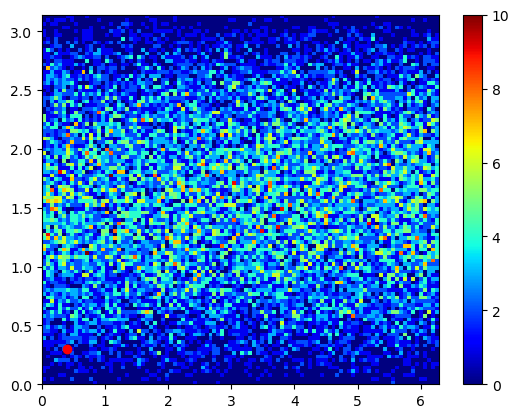

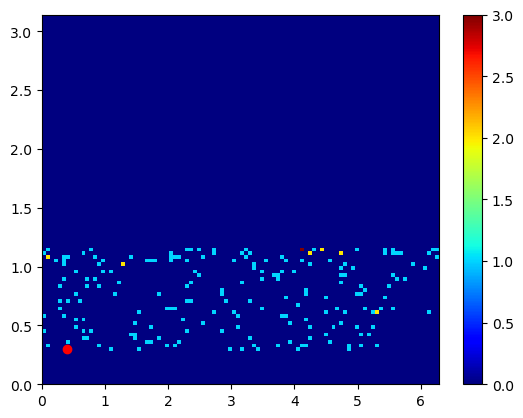

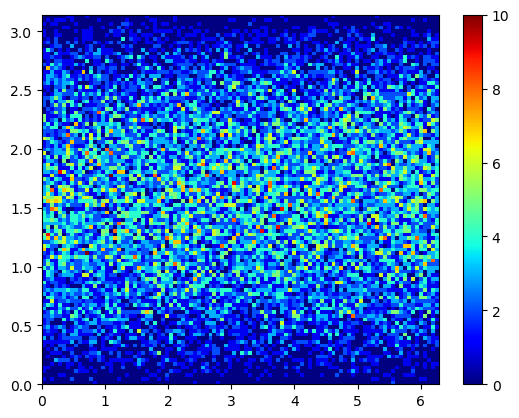

In [62]:
def SphericalToCarthesian (r,theta,phi) :
    if (len(theta) != len(phi) ) :
        sys.exit("ERROR: theta and phi do not have the same lenght")
    N=len(theta)
    x=np.zeros(N)
    y=np.zeros(N)
    z=np.zeros(N)
    for i in range(0,N) :
        x[i]=r*np.cos(theta[i])*np.sin(phi[i])
        y[i]=r*np.sin(theta[i])*np.sin(phi[i])
        z[i]=r*np.cos(phi[i])
    return x,y,z
        
        
plt.hist2d(thetas, phis, bins=(100, 100), range=[[0,2*np.pi],[0,np.pi]],cmap=plt.cm.jet)
plt.plot(0.4, 0.3, marker="o", color="red")
plt.colorbar()
plt.show()

plt.hist2d(Cher_thetas,Cher_phis, bins=(100, 100), range=[[0,2*np.pi],[0,np.pi]],cmap=plt.cm.jet)
plt.plot(0.4, 0.3, marker="o", color="red")
plt.colorbar()
plt.show()

plt.hist2d(Scint_thetas,Scint_phis, bins=(100,100), range=[[0,2*np.pi],[0,np.pi]],cmap=plt.cm.jet)
plt.colorbar()
plt.show()



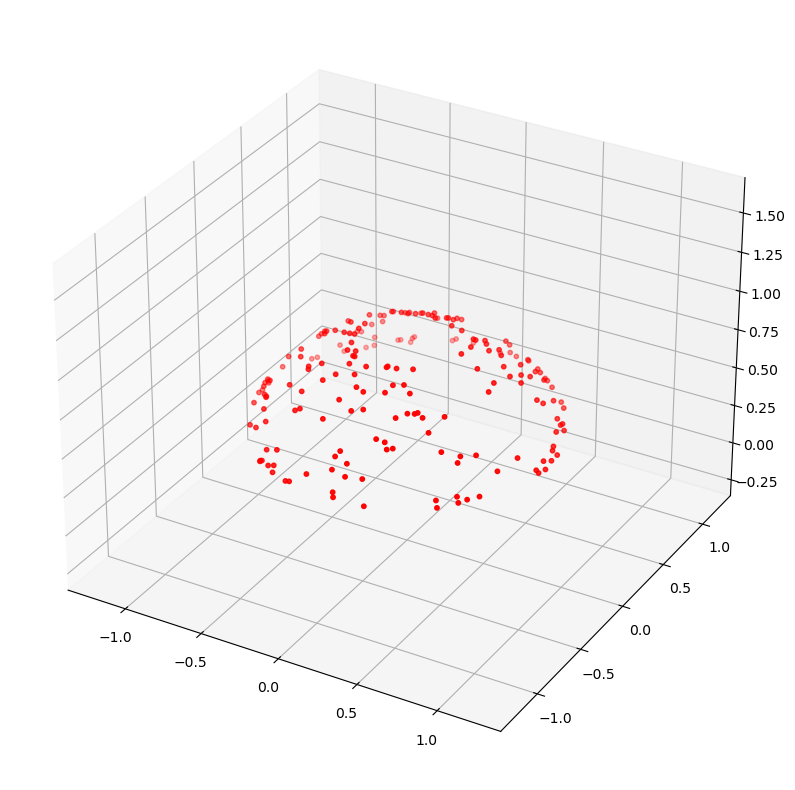

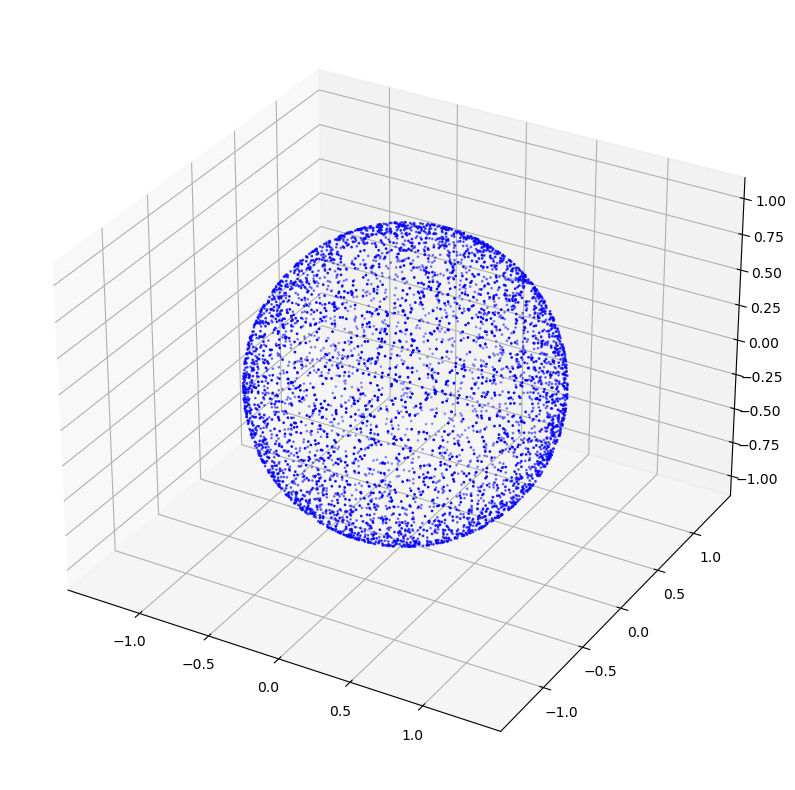

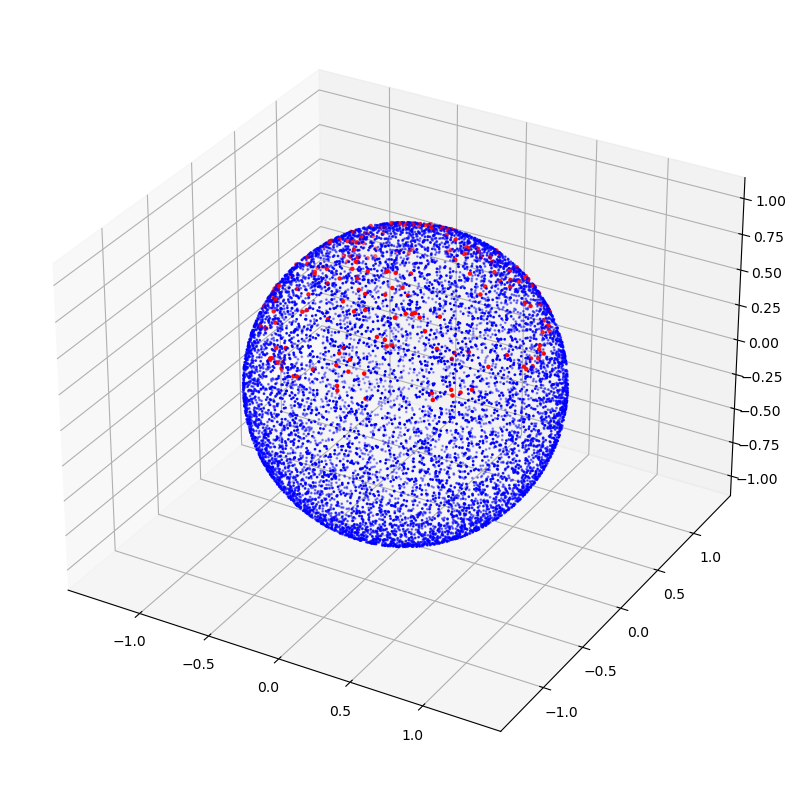

In [60]:
x_scint,y_scint,z_scint = SphericalToCarthesian(1.,Scint_thetas,Scint_phis)
x_cher,y_cher,z_cher = SphericalToCarthesian(1.,Cher_thetas,Cher_phis)
x_tot,y_tot,z_tot = SphericalToCarthesian(1.,thetas,phis)
sizes = np.full(len(x_cher),10)
sizes_scint = np.full(len(x_scint),1)

colors_array = []
sizes_tot = []
for i in range (0,N) :
    if types[i] == 0:
        colors_array.append("blue")
        sizes_tot.append(1)
    else :
        colors_array.append("red")
        sizes_tot.append(5)

def Make3dPlot(X,Y,Z,sizes,color=None) :


    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(projection='3d')

    scat = ax.scatter(X, Y, Z,s=sizes, c=color)

    # Create cubic bounding box to simulate equal aspect ratio. Default aspect ratio is 4:4:3, fix the constants to fix the ratio
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.6666*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.6666*(X.max()+X.min())
    Yb = 0.6666*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.6666*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')

    plt.grid()
    plt.show()

Make3dPlot(x_cher,y_cher,z_cher,sizes,"red")

scattlim=5000 #limit the scintillation events plotted 
Make3dPlot(x_scint[:scattlim],y_scint[:scattlim],z_scint[:scattlim],sizes_scint[:scattlim],"blue")
cut_tot=N-10000 #same as before, but the cut is at the end because it would exclude all cherenkov events otherwise
Make3dPlot(x_tot[cut_tot:],y_tot[cut_tot:],z_tot[cut_tot:],sizes_tot[cut_tot:],colors_array[cut_tot:])

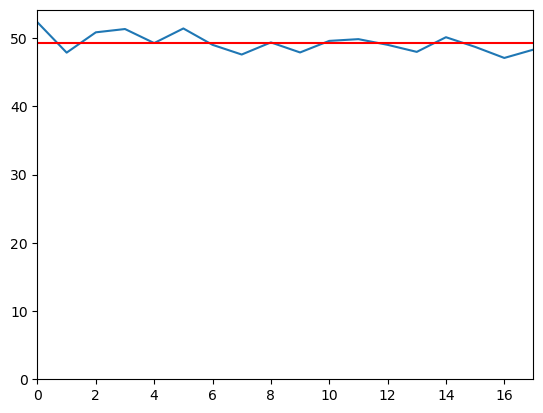

Il $\chi^2$ vale: 0.7247941887650575


In [43]:
#chi squared test for uniform distribution, see Malkin paper for numbers
counter = np.zeros(18)

def DegtoRad (deg) :
    return deg*(2*np.pi)/360
def RadToDeg (rad) :
    return rad*360/(2*np.pi)

def CountPhiEvents (HighLimit,LowLimit,values) :
    return sum(map(lambda x : x > DegtoRad(LowLimit) and  x < DegtoRad(HighLimit) , values))


ExpectedValue = len(Scint_phis)/406
counter[0] = CountPhiEvents(180,90+80.1375,Scint_phis) / 3
counter[1] = CountPhiEvents(90+80.1375,90+70.2010,Scint_phis) / 9
counter[2] = CountPhiEvents(90+70.2010,90+60.1113,Scint_phis) / 15
counter[3] = CountPhiEvents(90+60.1113,90+50.2170,Scint_phis) / 20
counter[4] = CountPhiEvents(90+50.2170,90+40.5602,Scint_phis) / 24
counter[5] = CountPhiEvents(90+40.5602,90+30.1631,Scint_phis) / 30
counter[6] = CountPhiEvents(90+30.1631,90+20.7738,Scint_phis) / 30
counter[7] = CountPhiEvents(90+20.7738,90+10.2148,Scint_phis) / 36
counter[8] = CountPhiEvents(90+10.2148,90,Scint_phis) / 36
counter[9] = CountPhiEvents(90,90-10.2148,Scint_phis) / 36
counter[10] = CountPhiEvents(90-10.2148,90-20.7738,Scint_phis) / 36
counter[11] = CountPhiEvents(90-20.7738,90-30.1631,Scint_phis) / 30
counter[12] = CountPhiEvents(90-30.1631,90-40.5602,Scint_phis) / 30
counter[13] = CountPhiEvents(90-40.5602,90-50.2170,Scint_phis) / 24
counter[14] = CountPhiEvents(90-50.2170,90-60.1113,Scint_phis) / 20
counter[15] = CountPhiEvents(90-60.1113,90-70.2010,Scint_phis) / 15
counter[16] = CountPhiEvents(90-70.2010,90-80.1375,Scint_phis) / 9
counter[17] = CountPhiEvents(90-80.1375,0,Scint_phis) / 3


#print(ExpectedValue,"\n",counter)

plt.plot(np.arange(18),counter)
plt.axhline(ExpectedValue,color="r")
plt.ylim(0, ExpectedValue + ExpectedValue/10)
plt.xlim(0,17)
plt.show()

chi_squared=0
for i in counter:
    chi_squared += (i-ExpectedValue)**2/i
print("Il $\chi^2$ vale:",chi_squared)

L'energia massima che può prendere un elettrone emesso da neutrino da 7-Be vale : 0.6649166434731434 MeV


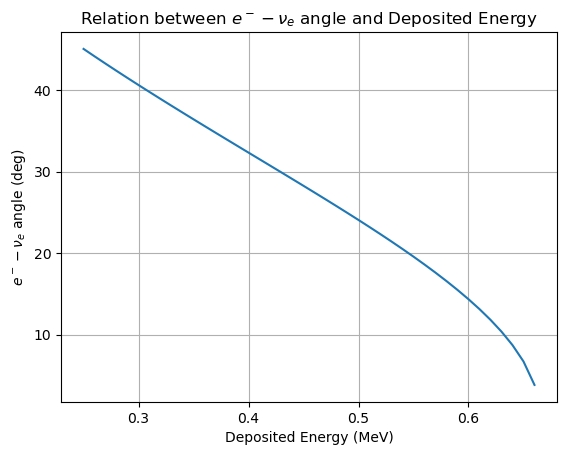

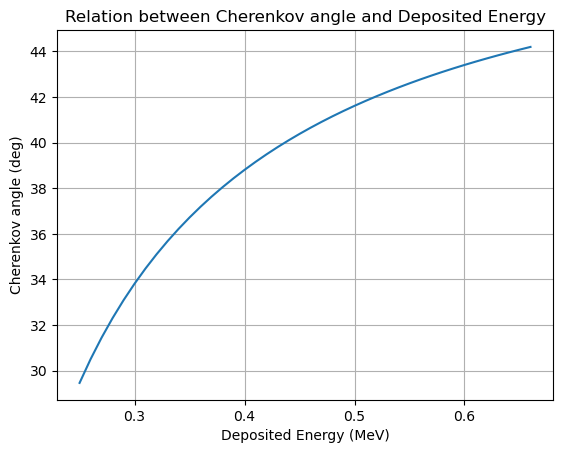

In [44]:
m_e = 0.51099895000
n = 1.55
Be7_energy = 0.862

energy_limit=2*Be7_energy**2/(m_e+2*Be7_energy) 
print("L'energia massima che può prendere un elettrone emesso da neutrino da 7-Be vale :",energy_limit,"MeV")

T = np.arange(0.25,energy_limit,0.01)
theta_e = RadToDeg(np.arccos(( 1 + (m_e/Be7_energy) ) * np.sqrt((T)/(T+2*m_e))))
beta = np.sqrt(1-(m_e/(m_e+T))**2)
theta_cher = RadToDeg(np.arccos(1/(n*beta)))

plt.plot(T,theta_e)
plt.title("Relation between $ e^- - \\nu_e $ angle and Deposited Energy")
plt.xlabel("Deposited Energy (MeV)")
plt.ylabel("$ e^- - \\nu_e $ angle (deg)")
plt.grid()
#plt.savefig("Theta_e.jpg")
plt.show()


plt.plot(T,theta_cher)
plt.title("Relation between Cherenkov angle and Deposited Energy")
plt.xlabel("Deposited Energy (MeV)")
plt.ylabel("Cherenkov angle (deg)")
plt.grid()
#plt.savefig("Cherenkov_angle.jpg")
plt.show()

